## [RQ1] Who wants to be a Champion? During a season could happen that a team has bad periods. For example, more than three consecutive games lost, or it could have a positive trend where it seems to be unbeatable. Let's visualize this trends!

## Create a plot where each point (x,y) represents the number of points obtained by team x at game week y. In order to show the trends, points related to the same team must be connected to each other. Remind: in soccer each team gets 3 points for a win, 1 point for a tied game, and 0 for a loss. Highlight the two teams that got the longest winning streak (# of consecutive wins), and the two teams that got the longest losing streak (# of consecutive losses).



In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
matches=pd.read_json(r"matches_England.json")


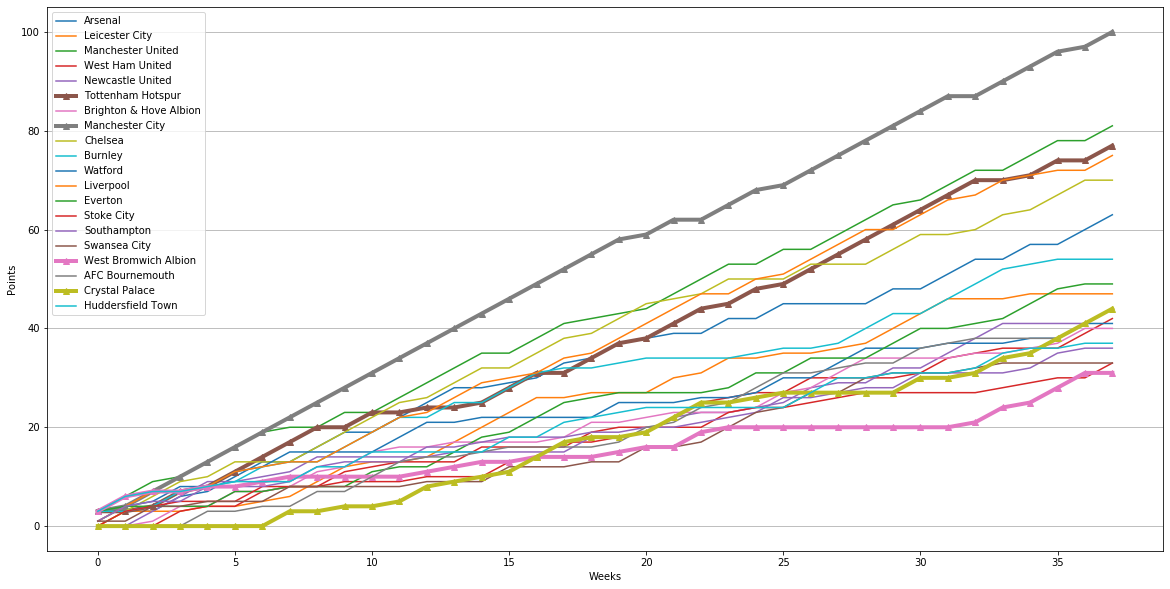

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
def tS(elem):
    return elem[1]
d = {}  #Dictionary for all the scores
d2 =  {} #Dictionary for the wins,looses and draw
l=[]
dw=[]
dl=[]

for i in matches.sort_values("gameweek").index:  #That's a huge for, that takes all the json file sorted from gameweek 1
    l=matches.iloc[i]["label"].split(", ")
    l[0]=l[0].split(" - ")
    l[1]=l[1].split(" - ")    #splitting the label part to check the teams, if the team is not included
    if l[0][0] in d:          #in the dictionary, than it will be created a new key d[Team]=[]
        None
    else:
        d[l[0][0]]=[]                    
        d2[l[0][0]]=[]
    if l[0][1] in d:
        None
    else:
        d[l[0][1]]=[]
        d2[l[0][1]]=[]
    #--------------END of Creation and Check in the dictionary the existance of the key----------------
        
    #-------------START of Checking of the score------------------------------
    #print(l)
    if l[1][0]>l[1][1]:
        
        if d[l[0][0]]==[]:
            d[l[0][0]].append((3))
            d2[l[0][0]].append("win")
        else:
            d[l[0][0]].append((d[l[0][0]][len(d[l[0][0]])-1]+3))
            d2[l[0][0]].append("win")
            
        if d[l[0][1]]==[]:
            d[l[0][1]].append((0))
            d2[l[0][1]].append("loose")
        else:
            d[l[0][1]].append((d[l[0][1]][len(d[l[0][1]])-1]))
            d2[l[0][1]].append("loose")
            
    elif l[1][0]==l[1][1]:
        if d[l[0][0]]==[]:
            d[l[0][0]].append((1))
            d2[l[0][0]].append("draw")
        else:
            d[l[0][0]].append((d[l[0][0]][len(d[l[0][0]])-1]+1))
            d2[l[0][0]].append("draw")
            
        if d[l[0][1]]==[]:
            d[l[0][1]].append((1))
            d2[l[0][1]].append("draw")
        else:
            d[l[0][1]].append((d[l[0][1]][len(d[l[0][1]])-1]+1))
            d2[l[0][1]].append("draw")
    else:
        if d[l[0][1]]==[]:
            d[l[0][1]].append((3))
            d2[l[0][1]].append("win")
        else:
            d[l[0][1]].append((d[l[0][1]][len(d[l[0][1]])-1]+3))
            d2[l[0][1]].append("win")
            
        if d[l[0][0]]==[]:
            d[l[0][0]].append((0))
            d2[l[0][0]].append("loose")
        else:
            d[l[0][0]].append((d[l[0][0]][len(d[l[0][0]])-1]))
            d2[l[0][0]].append("loose")
#---- ------END of checking the scores-------
#so now you have two dictionaries, d has for every team a list of 39 elements with their score
#and d2 a dictionary that has for every team a sequence of "win", "loose" and "draw"
#print(d)
#print(d2)

#----------START  Check the top two winsteark and loosestreak teams----------

#dw will be a list of the two teams with the highest winstreak
#dl will be a list of the two teams with the highest loosestreak
for elem in d2: #here we take and element of the dictionary d2, so every TEAM
    recordloose=[]
    recordwin=[]
    a=0
    b=0
    for j in d2[elem]:#here we count how many "win" and "loose it has in sequence and append it 
                      #into a list recordwin and recordloose 
        if j=="win":
            a+=1
        else:
            recordwin.append(a)
            a=0
        if j=="loose":
            b+=1
        else:
            recordloose.append(b)
            b=0
    recordloose.append(b)
    recordwin.append(a)
    if len(dw)<2:  #We add the maximum record of consecutive wins and the name of the team into another list dw
        dw.append([elem,max(recordwin)])
    else:
        dw.append([elem,max(recordwin)]) #When the len of dw is 2 we start adding the values of the new teams into dw
        dw.sort(key=tS) #We sort the list, with the second element as the key, and we remove the first elem of the list
        dw.remove(dw[0])#So dw will be again len=2 with the two maximum element in it
        
    if len(dl)<2:
        dl.append([elem,max(recordloose)])
    else:
        dl.append([elem,max(recordloose)])
        dl.sort(key=tS)
        dl.remove(dl[0])
#-------------------END of the check----------------        
#print(dw)      so now we have the two teams with the highest win streak
#print(dl)      and the two teams with the highest loosestreak


#---------START of creation of the plot----------------
dw=[dw[0][0],dw[1][0],dl[0][0],dl[1][0]] #I merge both of then into a list
plt.figure(figsize=(20,10))
for k in d:
    if k in dw:
        plt.plot(d[k],"^-", linewidth=4) #Highlight the two teams
    else:
        plt.plot(d[k]) 
        dw.append(k)
plt.grid(axis="y")
plt.legend(d.keys())
plt.xlabel("Weeks")
plt.ylabel("Points")
plt.show()

## [RQ2] Is there a home-field advantage? It is generally believed that there is an underlying home field advantage in sport, i.e. an highest probability of winning of the home team. Let's check for this, and see whether the outcome of the game (win, draw, lose) is correlated to the playing side (home or away). For 5 different teams of Premier League, show the contingency table (outcome x side). Therefore, perform an "overall" Chi-squared test in the following way: build a unique contingency table, that contains all the matches in which only one of the 5 teams previously selected is involved, to see whether there is home field advantage. State clearly the tested hypothesis and whether it is accepted or rejected.

In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [13]:
players = pd.read_json(r'players.json')
teams = pd.read_json(r'teams.json')
matches_PL = pd.read_json(r'matches_England.json')

In [14]:
teams['nation'] = teams.apply(lambda x: x['area']['name'], axis = 1)
teams = teams[teams.apply(lambda x: x['type'] == 'club', axis = 1)]
teams = teams.drop(['type', 'city', 'area'], axis = 1)

In [15]:
premier_league_teams = teams[teams.apply(lambda x: x['nation'] == 'England', axis = 1)]
premier_league_teams


,name,officialName,wyId,nation
0,Newcastle United,Newcastle United FC,1613,England
8,Huddersfield Town,Huddersfield Town FC,1673,England
26,AFC Bournemouth,AFC Bournemouth,1659,England
27,Brighton & Hove Albion,Brighton & Hove Albion FC,1651,England
39,Burnley,Burnley FC,1646,England
54,Leicester City,Leicester City FC,1631,England
55,West Ham United,West Ham United FC,1633,England
56,Stoke City,Stoke City FC,1639,England
60,Watford,Watford FC,1644,England
65,Everton,Everton FC,1623,England


In [16]:
def get_teams(label):
    return(label.split(',')[0].split(' - '))

def get_winner(label):
    teams = get_teams(label)
    score = list(map(int, label.split(',')[1].split(' - ')))
    if(score[0] > score[1]):
        return(teams[0])
    elif(score[1] > score[0]):
        return(teams[1])
    return('DRAW')

def get_victories_team(team_name, matches):
    return(get_matches_per_team(team_name, matches).apply(lambda x : get_winner(x['label']), axis = 1))

def get_matches_per_team(team, matches):
    return(matches[matches.apply(lambda x : team in get_teams(x['label']), axis = 1)])


In [17]:

# Pick 5 clubs from premier league
Manchester_city = get_matches_per_team('Manchester City', matches_PL)
Tottenham_hotspur = get_matches_per_team('Tottenham Hotspur', matches_PL)
Arsenal = get_matches_per_team('Arsenal', matches_PL)
Everton = get_matches_per_team('Everton', matches_PL)
Liverpool = get_matches_per_team('Liverpool', matches_PL)


In [18]:
# Change the winner column with the winning team
Manchester_city['winner'] = get_victories_team('Manchester City', matches_PL)
Tottenham_hotspur['winner'] = get_victories_team('Tottenham Hotspur', matches_PL)
Arsenal['winner'] = get_victories_team('Arsenal', matches_PL)
Everton['winner'] = get_victories_team('Everton', matches_PL)
Liverpool['winner'] = get_victories_team('Liverpool', matches_PL)

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [19]:
def get_result (x):
    if x == 'Arsenal': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Arsenal['outcome'] = Arsenal['winner'].apply(get_result)
#Arsenal.loc[Arsenal.winner == 'Arsenal', 'outcome'] = 'win'
#Arsenal.loc[Arsenal.winner == 'DRAW', 'outcome'] = 'draw'
#Arsenal.loc[(Arsenal.winner != 'Arsenal') & (Arsenal.winner != 'DRAW'), 'outcome'] = 'lose'
Arsenal


/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId,outcome
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,Arsenal,2500091,win
13,364,"May 9, 2018 at 8:45:00 PM GMT+2",2018-05-09 18:45:00,Regular,31,"Leicester City - Arsenal, 3 - 1","[{'refereeId': 408156, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",King Power Stadium,Leicester City,2500022,lose
16,364,"May 6, 2018 at 5:30:00 PM GMT+2",2018-05-06 15:30:00,Regular,37,"Arsenal - Burnley, 5 - 0","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500080,win
27,364,"April 29, 2018 at 5:30:00 PM GMT+2",2018-04-29 15:30:00,Regular,36,"Manchester United - Arsenal, 2 - 1","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Old Trafford,Manchester United,2500073,lose
38,364,"April 22, 2018 at 2:30:00 PM GMT+2",2018-04-22 12:30:00,Regular,35,"Arsenal - West Ham United, 4 - 1","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500060,win
48,364,"April 15, 2018 at 2:30:00 PM GMT+2",2018-04-15 12:30:00,Regular,34,"Newcastle United - Arsenal, 2 - 1","[{'refereeId': 378952, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",St. James' Park,Newcastle United,2500054,lose
57,364,"April 8, 2018 at 3:15:00 PM GMT+2",2018-04-08 13:15:00,Regular,33,"Arsenal - Southampton, 3 - 2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500040,win
67,364,"April 1, 2018 at 2:30:00 PM GMT+2",2018-04-01 12:30:00,Regular,32,"Arsenal - Stoke City, 3 - 0","[{'refereeId': 378951, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 0, 'side': ...",Emirates Stadium,Arsenal,2500029,win
82,364,"March 11, 2018 at 2:30:00 PM GMT+1",2018-03-11 13:30:00,Regular,30,"Arsenal - Watford, 3 - 0","[{'refereeId': 384888, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500010,win
92,364,"March 4, 2018 at 2:30:00 PM GMT+1",2018-03-04 13:30:00,Regular,29,"Brighton & Hove Albion - Arsenal, 2 - 1","[{'refereeId': 385912, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The American Express Community Stadium,Brighton & Hove Albion,2499999,lose


In [20]:
def get_side_arsenal(x):
    if get_teams(x)[0] == 'Arsenal': return 'home'
    else: return 'away'
Arsenal['side'] = Arsenal['label'].apply(get_side_arsenal)
Arsenal

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId,outcome,side
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,Arsenal,2500091,win,away
13,364,"May 9, 2018 at 8:45:00 PM GMT+2",2018-05-09 18:45:00,Regular,31,"Leicester City - Arsenal, 3 - 1","[{'refereeId': 408156, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",King Power Stadium,Leicester City,2500022,lose,away
16,364,"May 6, 2018 at 5:30:00 PM GMT+2",2018-05-06 15:30:00,Regular,37,"Arsenal - Burnley, 5 - 0","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500080,win,home
27,364,"April 29, 2018 at 5:30:00 PM GMT+2",2018-04-29 15:30:00,Regular,36,"Manchester United - Arsenal, 2 - 1","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Old Trafford,Manchester United,2500073,lose,away
38,364,"April 22, 2018 at 2:30:00 PM GMT+2",2018-04-22 12:30:00,Regular,35,"Arsenal - West Ham United, 4 - 1","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500060,win,home
48,364,"April 15, 2018 at 2:30:00 PM GMT+2",2018-04-15 12:30:00,Regular,34,"Newcastle United - Arsenal, 2 - 1","[{'refereeId': 378952, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",St. James' Park,Newcastle United,2500054,lose,away
57,364,"April 8, 2018 at 3:15:00 PM GMT+2",2018-04-08 13:15:00,Regular,33,"Arsenal - Southampton, 3 - 2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500040,win,home
67,364,"April 1, 2018 at 2:30:00 PM GMT+2",2018-04-01 12:30:00,Regular,32,"Arsenal - Stoke City, 3 - 0","[{'refereeId': 378951, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 0, 'side': ...",Emirates Stadium,Arsenal,2500029,win,home
82,364,"March 11, 2018 at 2:30:00 PM GMT+1",2018-03-11 13:30:00,Regular,30,"Arsenal - Watford, 3 - 0","[{'refereeId': 384888, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,Arsenal,2500010,win,home
92,364,"March 4, 2018 at 2:30:00 PM GMT+1",2018-03-04 13:30:00,Regular,29,"Brighton & Hove Albion - Arsenal, 2 - 1","[{'refereeId': 385912, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The American Express Community Stadium,Brighton & Hove Albion,2499999,lose,away


In [21]:
contingency_arsenal = pd.crosstab(Arsenal['outcome'], Arsenal['side'])
contingency_arsenal
    

side,away,home
outcome,,
draw,4,2
lose,11,2
win,4,15


In [22]:
chi2_contingency(contingency_arsenal)

(13.265856950067477, 0.001316302676697684, 2, array([[3. , 3. ],
        [6.5, 6.5],
        [9.5, 9.5]]))

In [23]:
# Contingency for Manchester City
def get_result_mc (x):
    if x == 'Manchester City': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Manchester_city['outcome'] = Manchester_city['winner'].apply(get_result_mc)
def get_side_mc(x):
    if get_teams(x)[0] == 'Manchester City': return 'home'
    else: return 'away'
Manchester_city['side'] = Manchester_city['label'].apply(get_side_mc)
Manchester_city


/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId,outcome,side
6,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Southampton - Manchester City, 0 - 1","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",St. Mary's Stadium,Manchester City,2500095,win,away
11,364,"May 9, 2018 at 9:00:00 PM GMT+2",2018-05-09 19:00:00,Regular,31,"Manchester City - Brighton & Hove Albion, 3 - 1","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Etihad Stadium,Manchester City,2500024,win,home
18,364,"May 6, 2018 at 2:30:00 PM GMT+2",2018-05-06 12:30:00,Regular,37,"Manchester City - Huddersfield Town, 0 - 0","[{'refereeId': 385909, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",Etihad Stadium,DRAW,2500085,draw,home
28,364,"April 29, 2018 at 3:15:00 PM GMT+2",2018-04-29 13:15:00,Regular,36,"West Ham United - Manchester City, 1 - 4","[{'refereeId': 385915, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1633': {'scoreET': 0, 'coachId': 8235, 'side...",London Stadium,Manchester City,2500078,win,away
37,364,"April 22, 2018 at 5:30:00 PM GMT+2",2018-04-22 15:30:00,Regular,35,"Manchester City - Swansea City, 5 - 0","[{'refereeId': 378951, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'10531': {'scoreET': 0, 'coachId': 32573, 'si...",Etihad Stadium,Manchester City,2500065,win,home
49,364,"April 14, 2018 at 8:45:00 PM GMT+2",2018-04-14 18:45:00,Regular,34,"Tottenham Hotspur - Manchester City, 1 - 3","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",Wembley Stadium,Manchester City,2500057,win,away
58,364,"April 7, 2018 at 6:30:00 PM GMT+2",2018-04-07 16:30:00,Regular,33,"Manchester City - Manchester United, 2 - 3","[{'refereeId': 384888, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",Etihad Stadium,Manchester United,2500045,lose,home
68,364,"March 31, 2018 at 6:30:00 PM GMT+2",2018-03-31 16:30:00,Regular,32,"Everton - Manchester City, 1 - 3","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Goodison Park,Manchester City,2500033,win,away
80,364,"March 12, 2018 at 9:00:00 PM GMT+1",2018-03-12 20:00:00,Regular,30,"Stoke City - Manchester City, 0 - 2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1639': {'scoreET': 0, 'coachId': 8329, 'side...",Bet365 Stadium,Manchester City,2500016,win,away
91,364,"March 4, 2018 at 5:00:00 PM GMT+1",2018-03-04 16:00:00,Regular,29,"Manchester City - Chelsea, 1 - 0","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",Etihad Stadium,Manchester City,2500004,win,home


In [24]:
contingency_mancity = pd.crosstab(Manchester_city['outcome'], Manchester_city['side'])
contingency_mancity

side,away,home
outcome,,
draw,2,2
lose,1,1
win,16,16


In [25]:
chi2_contingency(contingency_mancity)

(0.0, 1.0, 2, array([[ 2.,  2.],
        [ 1.,  1.],
        [16., 16.]]))

In [30]:
#Contingency for Everton
def get_result_everton (x):
   if x == 'Everton': return 'win'
   elif x == 'DRAW': return 'draw'
   else: return 'lose'
Everton['outcome'] = Everton['winner'].apply(get_result_everton)
def get_side_everton(x):
   if get_teams(x)[0] == 'Everton': return 'home'
   else: return 'away'
Everton['side'] = Everton['label'].apply(get_side_everton)
Everton

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId,outcome,side
9,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"West Ham United - Everton, 3 - 1","[{'refereeId': 408156, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",London Stadium,West Ham United,2500098,lose,away
19,364,"May 5, 2018 at 6:30:00 PM GMT+2",2018-05-05 16:30:00,Regular,37,"Everton - Southampton, 1 - 1","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Goodison Park,DRAW,2500083,draw,home
32,364,"April 28, 2018 at 4:00:00 PM GMT+2",2018-04-28 14:00:00,Regular,36,"Huddersfield Town - Everton, 0 - 2","[{'refereeId': 381852, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",The John Smith's Stadium,Everton,2500071,win,away
36,364,"April 23, 2018 at 9:00:00 PM GMT+2",2018-04-23 19:00:00,Regular,35,"Everton - Newcastle United, 1 - 0","[{'refereeId': 379443, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Goodison Park,Everton,2500063,win,home
54,364,"April 14, 2018 at 4:00:00 PM GMT+2",2018-04-14 14:00:00,Regular,34,"Swansea City - Everton, 1 - 1","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Liberty Stadium,DRAW,2500056,draw,away
65,364,"April 7, 2018 at 1:30:00 PM GMT+2",2018-04-07 11:30:00,Regular,33,"Everton - Liverpool, 0 - 0","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Goodison Park,DRAW,2500043,draw,home
68,364,"March 31, 2018 at 6:30:00 PM GMT+2",2018-03-31 16:30:00,Regular,32,"Everton - Manchester City, 1 - 3","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Goodison Park,Manchester City,2500033,lose,home
79,364,"March 17, 2018 at 3:00:00 PM GMT+1",2018-03-17 14:00:00,Regular,31,"Stoke City - Everton, 1 - 2","[{'refereeId': 384888, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Bet365 Stadium,Everton,2500025,win,away
84,364,"March 10, 2018 at 4:00:00 PM GMT+1",2018-03-10 15:00:00,Regular,30,"Everton - Brighton & Hove Albion, 2 - 0","[{'refereeId': 388333, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Goodison Park,Everton,2500012,win,home
99,364,"March 3, 2018 at 1:30:00 PM GMT+1",2018-03-03 12:30:00,Regular,29,"Burnley - Everton, 2 - 1","[{'refereeId': 385737, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Turf Moor,Burnley,2500000,lose,away


In [31]:
contingency_everton= pd.crosstab(Everton['outcome'], Everton['side'])
contingency_everton


side,away,home
outcome,,
draw,6,4
lose,10,5
win,3,10


In [32]:
chi2_contingency(contingency_everton)

(5.8358974358974365, 0.05404443405265433, 2, array([[5. , 5. ],
        [7.5, 7.5],
        [6.5, 6.5]]))

In [33]:
def get_result_liverpool(x):
    if x == 'Liverpool': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Liverpool['outcome'] = Liverpool['winner'].apply(get_result_liverpool)
def get_side_liverpool(x):
    if get_teams(x)[0] == 'Liverpool': return 'home'
    else: return 'away'
Liverpool['side'] = Liverpool['label'].apply(get_side_liverpool)
Liverpool

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId,outcome,side
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,Liverpool,2500092,win,home
17,364,"May 6, 2018 at 5:30:00 PM GMT+2",2018-05-06 15:30:00,Regular,37,"Chelsea - Liverpool, 1 - 0","[{'refereeId': 378952, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1612': {'scoreET': 0, 'coachId': 14791, 'sid...",Stamford Bridge,Chelsea,2500082,lose,away
35,364,"April 28, 2018 at 1:30:00 PM GMT+2",2018-04-28 11:30:00,Regular,36,"Liverpool - Stoke City, 0 - 0","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1639': {'scoreET': 0, 'coachId': 0, 'side': ...",Anfield,DRAW,2500072,draw,home
41,364,"April 21, 2018 at 1:30:00 PM GMT+2",2018-04-21 11:30:00,Regular,35,"West Bromwich Albion - Liverpool, 2 - 2","[{'refereeId': 385912, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1627': {'scoreET': 0, 'coachId': 0, 'side': ...",The Hawthorns,DRAW,2500068,draw,away
50,364,"April 14, 2018 at 6:30:00 PM GMT+2",2018-04-14 16:30:00,Regular,34,"Liverpool - AFC Bournemouth, 3 - 0","[{'refereeId': 385737, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",Anfield,Liverpool,2500052,win,home
65,364,"April 7, 2018 at 1:30:00 PM GMT+2",2018-04-07 11:30:00,Regular,33,"Everton - Liverpool, 0 - 0","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",Goodison Park,DRAW,2500043,draw,away
75,364,"March 31, 2018 at 1:30:00 PM GMT+2",2018-03-31 11:30:00,Regular,32,"Crystal Palace - Liverpool, 1 - 2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,Liverpool,2500032,win,away
76,364,"March 17, 2018 at 6:30:00 PM GMT+1",2018-03-17 17:30:00,Regular,31,"Liverpool - Watford, 5 - 0","[{'refereeId': 378952, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Anfield,Liverpool,2500023,win,home
89,364,"March 10, 2018 at 1:30:00 PM GMT+1",2018-03-10 12:30:00,Regular,30,"Manchester United - Liverpool, 2 - 1","[{'refereeId': 378951, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1612': {'scoreET': 0, 'coachId': 14791, 'sid...",Old Trafford,Manchester United,2500014,lose,away
93,364,"March 3, 2018 at 6:30:00 PM GMT+1",2018-03-03 17:30:00,Regular,29,"Liverpool - Newcastle United, 2 - 0","[{'refereeId': 408156, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1612': {'scoreET': 0, 'coachId': 14791, 'sid...",Anfield,Liverpool,2500003,win,home


In [34]:
contingency_liverpool= pd.crosstab(Liverpool['outcome'], Liverpool['side'])
contingency_liverpool

side,away,home
outcome,,
draw,5,7
lose,5,0
win,9,12


In [35]:
chi2_contingency(contingency_liverpool)

(5.761904761904763, 0.05608132660510642, 2, array([[ 6. ,  6. ],
        [ 2.5,  2.5],
        [10.5, 10.5]]))

In [36]:
premier_league_chi2_clubs = pd.concat([Manchester_city, Tottenham_hotspur, Arsenal, Everton, Liverpool])
premier_league_chi2_clubs = premier_league_chi2_clubs.filter(['label','outcome', 'side'])
premier_league_chi2_clubs = premier_league_chi2_clubs.drop_duplicates('label')
premier_league_chi2_clubs


/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,label,outcome,side
6,"Southampton - Manchester City, 0 - 1",win,away
11,"Manchester City - Brighton & Hove Albion, 3 - 1",win,home
18,"Manchester City - Huddersfield Town, 0 - 0",draw,home
28,"West Ham United - Manchester City, 1 - 4",win,away
37,"Manchester City - Swansea City, 5 - 0",win,home
49,"Tottenham Hotspur - Manchester City, 1 - 3",win,away
58,"Manchester City - Manchester United, 2 - 3",lose,home
68,"Everton - Manchester City, 1 - 3",win,away
80,"Stoke City - Manchester City, 0 - 2",win,away
91,"Manchester City - Chelsea, 1 - 0",win,home


In [37]:

contingency_premier_league= pd.crosstab(premier_league_chi2_clubs['outcome'], premier_league_chi2_clubs['side'])
contingency_premier_league



side,away,home
outcome,,
draw,14,13
lose,21,4
win,32,50


In [38]:
chi2_contingency(contingency_premier_league)

(15.54825654923216, 0.0004204738473680515, 2, array([[13.5, 13.5],
        [12.5, 12.5],
        [41. , 41. ]]))

## [RQ3] Which teams have the youngest coaches? Rank all the teams by the age of their coach and show the 10 teams with the youngest coaches. Remember that during a season a team could have more coaches, in that case pick the younger of them. Additionally, show the distirbutions of the ages of all coaches in Premier League, using a boxplot. (Hint: There's an attribute birthDate).


In [79]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [80]:
# Importing of the datasets Teams, Coaches & Matches
teams = pd.read_json('/home/mario/Desktop/Homework 2/teams.json')
coaches = pd.read_json('/home/mario/Desktop/Homework 2/coaches.json')

In [81]:
# We delete the unnecessary columns for coaches.
coaches.drop(['birthArea','lastName','middleName','firstName','currentTeamId','passportArea'], axis=1, inplace = True)

In [82]:
#Convert teams into a pandas DataFrame
teams = pd.DataFrame(teams)
# We drop the unnecessary columns for Teams.
teams.drop(["area", "city", "type","officialName"], axis=1, inplace = True)
# Rename the column wyId in order to merge later.
teams.rename(columns={'wyId':'teams'}, inplace=True)


In [83]:
teams = {}

In [84]:
with open(r'matches_England.json') as json_data:
    matches = json.load(json_data)


In [85]:

for i in range(len(matches)):
    list_keys=[*(matches[i]['teamsData'])]
    for key in list_keys:
        ID=matches[i]['teamsData'][key]['coachId']
        TEAM=matches[i]['teamsData'][key]['teamId']
        if TEAM not in teams:
            teams[TEAM]=[]
        if TEAM in teams and ID not in teams[TEAM] and ID != 0 :    
            teams[TEAM].append(ID)


In [91]:
df_coaches_teams = pd.DataFrame([(key, var) for (key, L) in teams.items() for var in L], 
                 columns=['teams', 'wyId'])  

In [92]:
df_coaches_teams

,teams,wyId
0,1646,8880
1,1659,8934
2,1628,8357
3,1628,268775
4,1627,7973
5,1627,9454
6,1627,149026
7,1609,7845
8,1673,18572
9,1651,8093


In [93]:
merged_df = pd.merge(df_coaches_teams, coaches, on='wyId')


In [96]:
dataset = pd.merge(merged_df, teams_dataframe, on='teams')

In [97]:
dataset = dataset.sort_values(by=['birthDate'], ascending=False) 

In [98]:
#Drop Antonio Conte because he was two times in the Dataset
dataset = dataset.drop(16)

In [99]:
final = dataset.drop_duplicates(subset='name', keep='first')
final


,teams,wyId,birthDate,shortName,name
1,1659,8934,1977-11-29,E. Howe,AFC Bournemouth
12,1644,71037,1977-07-12,Marco Silva,Watford
26,1631,8214,1975-12-04,M. Appleton,Leicester City
30,1623,434992,1973-10-16,D. Unsworth,Everton
15,1613,531745,1973-02-19,Paco,Newcastle United
28,1624,292863,1972-03-02,M. Pochettino,Tottenham Hotspur
24,10531,381291,1972-01-08,P. Clement,Swansea City
8,1673,18572,1971-10-19,D. Wagner,Huddersfield Town
20,1619,254174,1971-10-05,M. Pellegrino,Southampton
0,1646,8880,1971-06-28,S. Dyche,Burnley


In [103]:
youngest_coaches_teams = final.name[0:11]


In [108]:
youngest_coaches_teams

1       AFC Bournemouth
12              Watford
26       Leicester City
30              Everton
15     Newcastle United
28    Tottenham Hotspur
24         Swansea City
8     Huddersfield Town
20          Southampton
0               Burnley
18      Manchester City
Name: name, dtype: object

In [133]:
#imporing datetime to get the actual date in order to make the conversion to the actual age of the coach
from datetime import date

In [111]:
date.today()

datetime.date(2019, 10, 30)

In [132]:
#We convert all the birthDate into the actual age of the coach
age = []
for i in range(len(final)):
    born = list(map( int, final.birthDate.iloc[i].split("-")))
    today = date.today()
    age.append(today.year - born[0])
age

[42,
 42,
 44,
 46,
 46,
 47,
 47,
 48,
 48,
 48,
 48,
 49,
 50,
 50,
 51,
 52,
 56,
 58,
 61,
 70,
 42,
 42,
 44,
 46,
 46,
 47,
 47,
 48,
 48,
 48,
 48,
 49,
 50,
 50,
 51,
 52,
 56,
 58,
 61,
 70]

In [120]:
final['age'] = age

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
final

,teams,wyId,birthDate,shortName,name,age
1,1659,8934,1977-11-29,E. Howe,AFC Bournemouth,42
12,1644,71037,1977-07-12,Marco Silva,Watford,42
26,1631,8214,1975-12-04,M. Appleton,Leicester City,44
30,1623,434992,1973-10-16,D. Unsworth,Everton,46
15,1613,531745,1973-02-19,Paco,Newcastle United,46
28,1624,292863,1972-03-02,M. Pochettino,Tottenham Hotspur,47
24,10531,381291,1972-01-08,P. Clement,Swansea City,47
8,1673,18572,1971-10-19,D. Wagner,Huddersfield Town,48
20,1619,254174,1971-10-05,M. Pellegrino,Southampton,48
0,1646,8880,1971-06-28,S. Dyche,Burnley,48


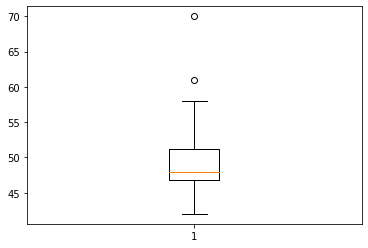

In [137]:
boxplot = plt.boxplot(final['age'])

## [RQ4] Find the top 10 players with the highest ratio between completed passes and attempted passes. For this task, consider all the different types of passes, and as specified in the website, a completed pass has tag 1801 (accurate event). In order to avoid meaningless results (e.g. players who played few minutes, and completed 2 passes over 2, achieving 100% ratio), select an arbitrary threshold of minimum attempted passes, in order to consider only the subset of players that played enough. Justify the choices you make.


In [43]:
import pandas as pd
players=pd.read_json(r"players.json", encoding = 'utf-8')
events=pd.read_json(r"events_England.json")
d={}         #This Dictionary will include every pass done from every players from every match in the Premiere League
l=[]         #This list will include the top 10
l1=[]        #This list will be usefull to get the names of the players
for i in events.index: #scan every event
    if events.iloc[i]["eventName"]=="Pass":       #When it found a Pass, it will be created a new value for a playerId
            if events.iloc[i]["playerId"] not in d:
                d[events.iloc[i]["playerId"]]=[events.iloc[i]["tags"][0].get("id")]
            else:
                d[events.iloc[i]["playerId"]].append(events.iloc[i]["tags"][0].get("id"))
#After that we have a HUGE dictionary, and to create that it will be necessary to scan every one of the 380000+ rows of the
#the event dataframe. So now we have to check which one has the best value and so we create a top 10
#I've decided that a player have at least done 20 passages(accurate or not), that's why I require that the list of passages
#done has to have more than 20 elements
for j in d:    #here we start the scan of the dictionary
    if len(l)<10 and len(d[j])>=20: #Obviously if the list has not a minimum of 10 elements we don't have a classification
        l.append([d[j].count(1801)/len(d[j])*100,j]) 
    elif len(d[j])>=20:
        l.append([d[j].count(1801)/len(d[j])*100,j]) #Here we add a new element, so the list now has 11 elements
        l.sort()                                    #We sort the rateo so the first element of the list has to be the one with
                                                    #The worst rateo
        l.remove(l[0])                              #and so we remove that one
        
        
l1=[l[i][1] for i in range(len(l))] #Then I'm looking for the names of the players because I have just their Id
                                    #So I used that list to be faster and so I could check if a player Id is into that list
for i in players.index:             #Here we scan all the players
    if players.iloc[i]["wyId"] in l1:
        for j in range(len(l1)):
            if players.iloc[i]["wyId"]==l1[j]:
                l[j][1]=players.iloc[i]["shortName"]     #Here we change the player Id with his name

#So unfortunally the database doesnt read special character for example Y. Tourè will be show ad "Y. Tour\\u00e9"
#And also M. Bešić will be show as M. Be\\u0161i\\u0107, so that's why I've done something like that
#I've tried to find a way to encode that but unfortnally it didn't works, even using encode and decode "utf-8"
l[9][1]="M. Bešić"
l[7][1]="Y. Touré"
l.sort(reverse=True) #So we reverse the list to get the Ranking
for i in range(len(l)):
    print("Position:",str(i+1).center(2),l[i][1].center(20), str(round(l[i][0],1)).center(6))

Position: 1        M. Bešić        95.7 
Position: 2       J. Stones        95.1 
Position: 3        Y. Touré        92.6 
Position: 4        C. Bravo        92.2 
Position: 5       V. Kompany       92.0 
Position: 6      N. Otamendi       91.9 
Position: 7        F. Delph        91.9 
Position: 8       L. Britton       91.4 
Position: 9     Mohamed Elneny     91.0 
Position: 10     D. Whitehead      90.9 


## [RQ6] Free your mind! Go further with the EDA (Exploratory Data Analysis) showing a new interesting result about the dataset that you found.



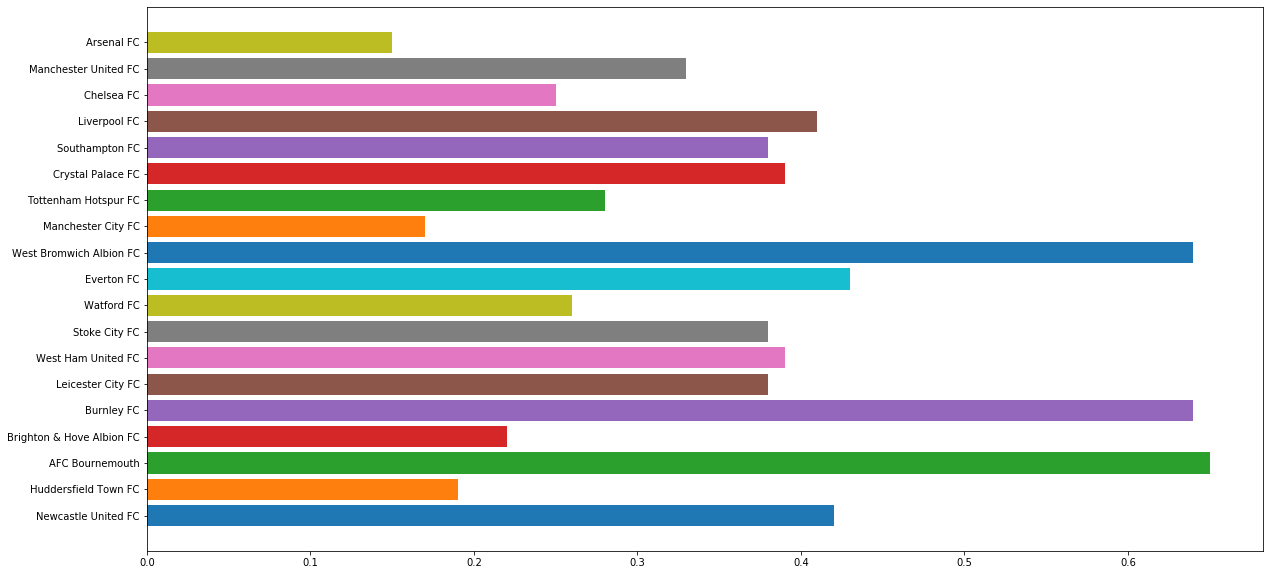

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
players=pd.read_json(r"players.json")
teams=pd.read_json(r"teams.json")
#So my idea comes from the tons of articles about Serie A that attacks italian teams saying that most of the team is not from
#Italy, so I have decided to check in the Premier League which teams has the most % of english players, very simple and very interesting!
d={} #dictionary with teamId as the key and a list as the value, the first element has to be the name of the team
l=[]

for i in teams.index: #scan every team creating the dictionary with d[TeamId]=[Name of the team]
    if teams.iloc[i]["area"].get("name")=="England" and teams.iloc[i]["officialName"]!="England":
        d[teams.iloc[i]["wyId"]]=[teams.iloc[i]["officialName"]]
for j in players.index: #Now we have the dictionary with the TeamId as the key we can start looking for the players of the team
    if players.iloc[j]["currentTeamId"] in d: #So if we found that a player has the same id of a team, we check it he is english
        if players.iloc[j]["birthArea"].get("name")=="England":
            d[players.iloc[j]["currentTeamId"]].append("Y") #Here we append "Y" if he is english
        else:
            d[players.iloc[j]["currentTeamId"]].append("N")#"N" if it is not
for elem in d:#So for every key of the dictionary
    l.append([d[elem].count("Y")/(len(d[elem])-1),d[elem][0]]) #we append into a new list a tuple with the count of every Y in
    #value of each key and the name of the team
plt.figure(figsize=(20,10)) #And here it's the result!
for i in range(len(l)):
    plt.barh(l[i][1], round(l[i][0],2))


## [CRQ1] What are the time slots of the match with more goals? Let's analyse and visualise the goals distribution into 9-minutes sets for all the matches. I.e., let's transform the minute of a goal from a continuous variable in a discrete variable (e.g. A goal scored in 5th minute, will end up in the interval [0-9)). Remind that every match goes usually from minute 0, to minute 90, but in football it is always added an arbitary amount of extra-time to every half of the match, thus consider also the intervals "45+" and "90+".

### Make a barplot with the absolute frequency of goals in all the time slots.
### Find the top 10 teams that score the most in the interval "81-90".
### Show if there are players that were able to score at least one goal in 8 different intervals.


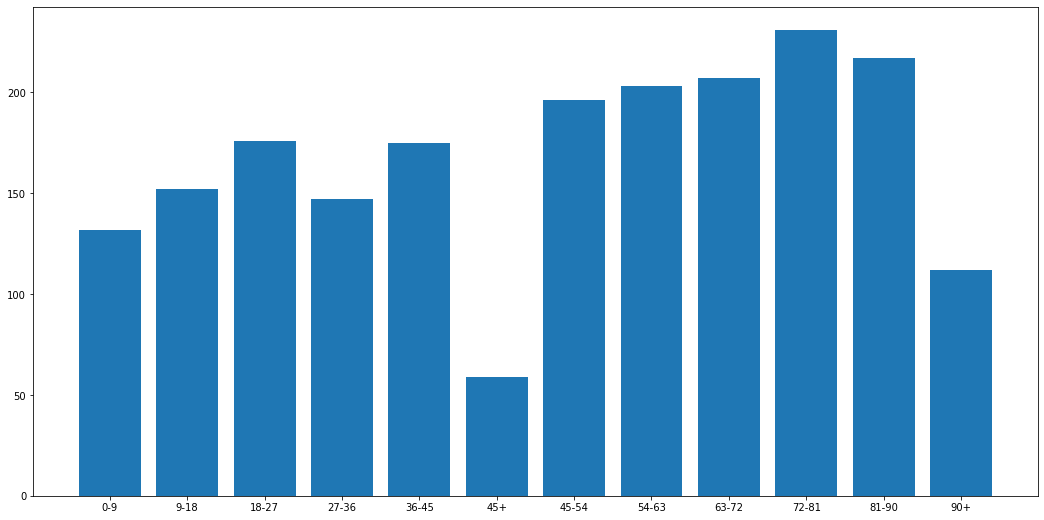

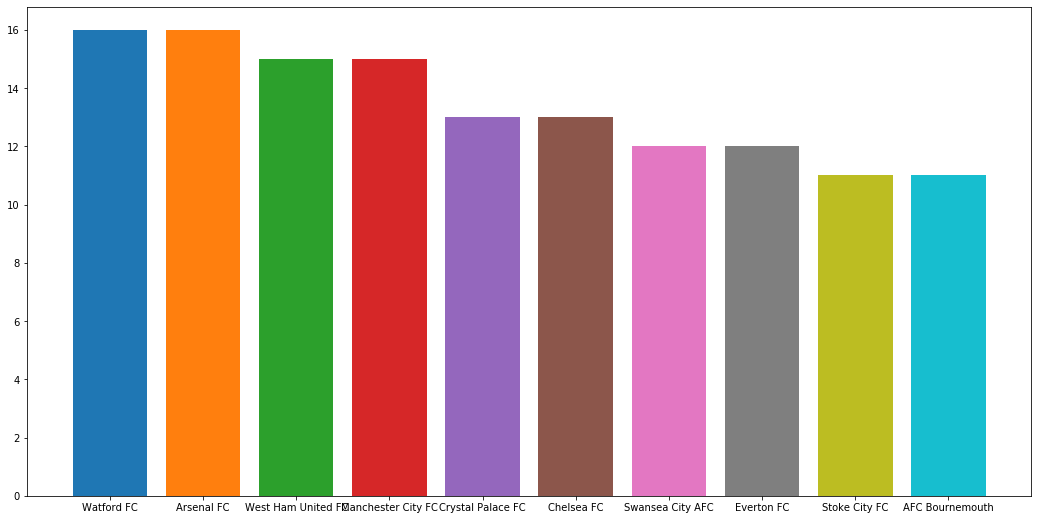

People who has scored in 8 different intervals
Ederson
Ł. Fabiański
R. Lukaku
David de Gea
J. Butland
K. Schmeichel
S. Mignolet
H. Kane
J. Pickford
R. Sterling
N. Pope
Gabriel Jesus
J. Vardy
Roberto Firmino
T. Courtois
Mohamed Salah
J. Lössl
H. Lloris
Álvaro Morata
R. Elliot
W. Hennessey
A. McCarthy
M. Arnautović
M. Ryan
J. Hart
O. Karnezis
P. Čech
Gomes
B. Foster
F. Forster
J. Speroni
A. Begović
Adri\u00e1n
A. Lacazette
W. Zaha
R. Mahrez
L. Karius


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import collections
matches=pd.read_json(r"matches_England.json")
events=pd.read_json(r"events_England.json")
teams=pd.read_json(r"teams.json")
players=pd.read_json(r"players.json")
player=[] #This list will be helpful in the last part of the request!
c1=collections.Counter() #I have used Counter see which players has done a goal in 8 different intervals
name=[]
d={}
d["0-9"]=[] #I have decided to create by myself those intervals, I know that it could not be the best solution, but it seems to
d["9-18"]=[] #be fair enough
d["18-27"]=[]
d["27-36"]=[]
d["36-45"]=[]
d["45+"]=[]
d["45-54"]=[]
d["54-63"]=[]
d["63-72"]=[]
d["72-81"]=[]
d["81-90"]=[]
d["90+"]=[]
l2=[]
l=[]  #Important list to collect the player Id

#Let's start!
##-----------START Make a barplot with the absolute frequency of goals in all the time slots---------------
for i in range(len(d.keys())): #First of all I created a list of sets,to get the Id's of the players that scored in different intervals
    l.append(set())

##This is my biggest algorithm, here we scan every line looking for a particular value int the first elem of the dictionary tags
#in every team lines, sometimes tags has a value so it results to be empty and here we recive a IndexError, that's why I used try and except

for i in events.index:
    try: # I used the tags key "101" a specif value that appears in first position of the tags folder when happens a goal
        if events.iloc[i]["tags"][0].get("id")==101 and events.iloc[i]["matchPeriod"]=="1H": 
            if 0<int(events.iloc[i]["eventSec"])//60<9: #as you seen I have devided the period in H1 and H2 and I have calculated the minutes of the play
                d["0-9"].append(events.iloc[i]["teamId"]) #Every time we get a goal it is archived into the correct intervals and with the teamId as the value
                l[0].add(events.iloc[i]["playerId"])#We also take the playerId beacuse it will be usefull in future
            elif 9<=int(events.iloc[i]["eventSec"])//60<18:
                d["9-18"].append(events.iloc[i]["teamId"])
                l[1].add(events.iloc[i]["playerId"])
            elif 18<=int(events.iloc[i]["eventSec"])//60<27:
                d["18-27"].append(events.iloc[i]["teamId"])
                l[2].add(events.iloc[i]["playerId"])
            elif 27<=int(events.iloc[i]["eventSec"])//60<36:
                d["27-36"].append(events.iloc[i]["teamId"])
                l[3].add(events.iloc[i]["playerId"])
            elif 36<=int(events.iloc[i]["eventSec"])//60<45:
                d["36-45"].append(events.iloc[i]["teamId"])
                l[4].add(events.iloc[i]["playerId"])
            else:
                d["45+"].append([events.iloc[i]["teamId"]])
                l[5].add(events.iloc[i]["playerId"])
        elif events.iloc[i]["tags"][0].get("id")==101 and events.iloc[i]["matchPeriod"]=="2H":
            if 0<int(events.iloc[i]["eventSec"])//60<9:
                d["45-54"].append([events.iloc[i]["teamId"]])
                l[6].add(events.iloc[i]["playerId"])
            elif 9<=int(events.iloc[i]["eventSec"])//60<18:
                d["54-63"].append(events.iloc[i]["teamId"])
                l[7].add(events.iloc[i]["playerId"])
            elif 18<=int(events.iloc[i]["eventSec"])//60<27:
                d["63-72"].append(events.iloc[i]["teamId"])
                l[8].add(events.iloc[i]["playerId"])
            elif 27<=int(events.iloc[i]["eventSec"])//60<36:
                d["72-81"].append(events.iloc[i]["teamId"])
                l[9].add(events.iloc[i]["playerId"])
            elif 36<=int(events.iloc[i]["eventSec"])//60<45:
                d["81-90"].append(events.iloc[i]["teamId"])
                l[10].add(events.iloc[i]["playerId"])
            else:
                d["90+"].append(events.iloc[i]["teamId"])
                l[11].add(events.iloc[i]["playerId"])
    except IndexError:
        continue

plt.figure(figsize=(18,9)) #Now we have for every period the number of goals and we can display a barplot 
height=[len(d[i]) for i in d.keys()]
bars=(d.keys())
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()
##-------------------END Make a barplot with the absolute frequency of goals in all the time slots------
#Here we take the set of teamId's
##-------------------START Find the top 10 teams that score the most in the interval "81-90"--------
z=set(d["81-90"])
for i in z:
    s=d["81-90"].count(i) #we count for every teamId how many time
    if len(l2)<10:
        l2.append([s,i])  #So until our list has less than 10 elem, we append (countofgoals,teamid)
    else:
        l2.append([s,i]) #When we have more than 10 elements we add a 11th, then we sort in base (countofgoals,teamid)
        l2.sort()  #So the first elem of the list has to be the team with less team in that intervals
        l2.remove(l2[0]) #and so we remove it
        
l1=[l2[i][1] for i in range(len(l2))] #Here we take in a list just the id's of the team
for j in teams.index: #and we look into teams to get their name
    if teams.iloc[j]["wyId"] in l1:
        for k in range(len(l1)):
            if l1[k]==teams.iloc[j]["wyId"]:
                l2[k].append(teams.iloc[j]["officialName"]) #and using append and remove we replace the Id with their name
                l2[k].remove(l2[k][1]) #so our list now has elem (number of goals, team name)
l2.sort(reverse=True)
plt.figure(figsize=(18,9))
for i in range(len(l2)): #And here we crate a barplot
    plt.bar(l2[i][1],height=l2[i][0])
plt.show()
##----------------END Find the top 10 teams that score the most in the interval "81-90"---------------------
#For the last part, I used a counter dictionary, so I have used c1 to count from the list l (that has a set of playerids)
#to count how many time they have scored so the min has to be 1 and the max 12 (10 intervals + E1 and E2)
##--------------------START Show if there are players that were able to score at least one goal in 8 different intervals-----
for i in range(len(l)):
    l[i]=list(l[i])
    for j in range(len(l[i])):
        if l[i][j] in c1:
            c1[l[i][j]]=c1[l[i][j]]+1
        else:
            c1[l[i][j]]=1
for j in c1.keys():#then I checked into c1 the Id of the players that has more or equal than 8 as the value, and i used a new list to get their ID
    if c1[j]>=8:
        player.append(j)
name=[]
for j in players.index: #Then I looked for the shortname into the player folder and here we get a list of players
    if players.iloc[j]["wyId"] in player:
        name.append(players.iloc[j]["shortName"])
#Unfortunally I had the same problem with Request 4, the latin character can't be read or maybe idk how to do that, also using utf-8
#So that's the best solution I have found!
name[1]="Ł. Fabiański"
name[16]="J. Lössl"
name[18]="Álvaro Morata"
name[22]="M. Arnautović"
name[26]="P. Čech"
name[31]="A. Begović"
print("People who has scored in 8 different intervals")
for i in range(len(name)):
    print(name[i])
#-----END Show if there are players that were able to score at least one goal in 8 different intervals.--------